# Unidad 4 - Análisis exploratorio de datos: Visualizaciones

### **Ejercicio N°1**

El dataset `iris.csv` contiene información sobre 150 flores de iris de tres especies diferentes: *setosa*, *versicolor* y *virginica*. Para cada flor, se midieron cuatro características: longitud y ancho del sépalo (la parte que rodea y protege el capullo de la flor) y longitud y ancho del pétalo (la parte coloreada de la flor).


In [88]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("/content/iris.csv")
df.head()

,id,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



1. Reproduzca el histograma mostrado en la siguiente figura para visualizar la distribución del ancho de sépalo. **Sugerencia:** configure previamente el *theme* de Seaborn empleando el argumento `style='ticks'` en la función `set_theme()`. El color de las barras debe ser **darkred**.

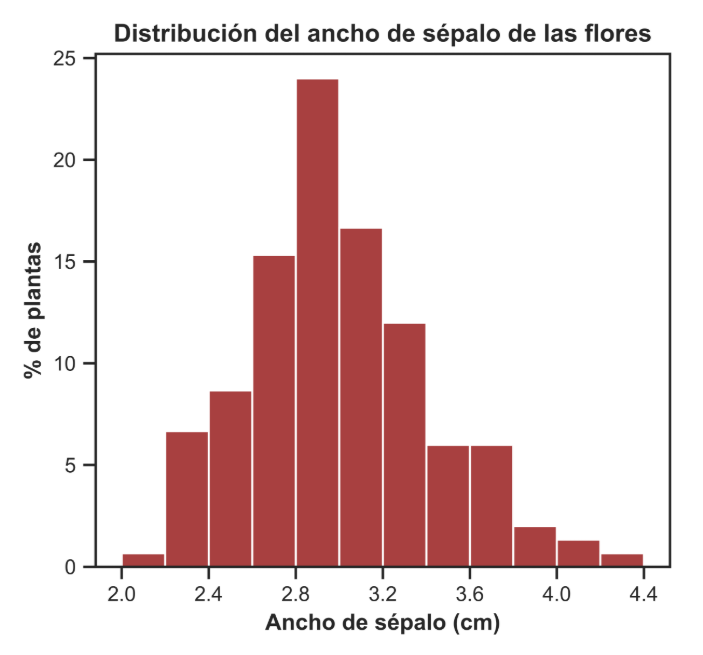
<br />


In [90]:
edges = np.arange(2, 4.4, 0.2)
labels= np.arange(2, 4.4, 0.4)

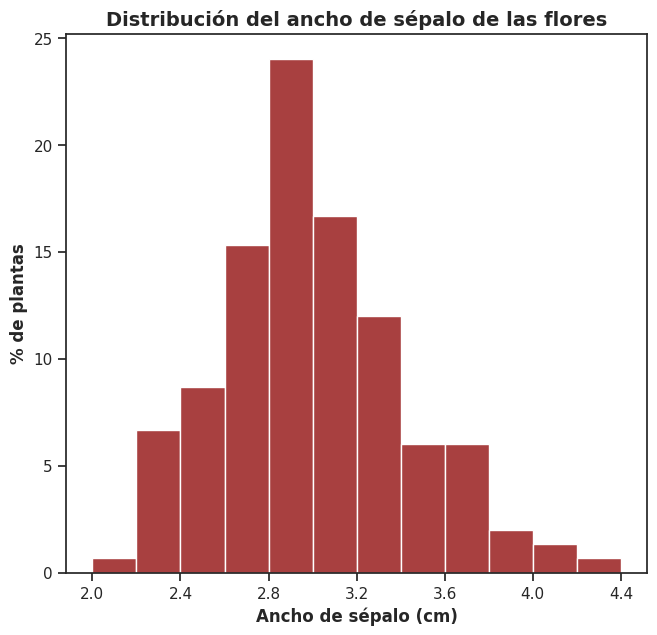

In [91]:
sns.set_theme(style='ticks')
plt.figure(figsize=(7.5, 7))
sns.histplot(df, x=df["sepal_width_cm"], stat='percent', color="darkred", bins=edges)
plt.xticks(labels)
plt.title("Distribución del ancho de sépalo de las flores", fontsize=14, weight='bold')
plt.xlabel("Ancho de sépalo (cm)", fontsize=12, weight="bold")
plt.ylabel("% de plantas", fontsize=12, weight="bold")
plt.show()


2. Realice el gráfico en paneles que se muestra en la siguiente figura, en el que se representan los gráficos de violín para las variables ancho de sépalo y ancho de pétalo. **Sugerencia:** utilice `plt.subplots()` para crear los paneles y personalice cada gráfico en su respectivo eje. ¿Cuál de las siguientes opciones describe de una **manera más precisa** la forma de cada una de las distribuciones? *Distribución simétrica* - *Distribución sesgada a la derecha* - *Distribución unimodal* - *Distribución bimodal* - *Distribución normal* - *Distribución sesgada a la izquierda* - *Distribución uniforme*

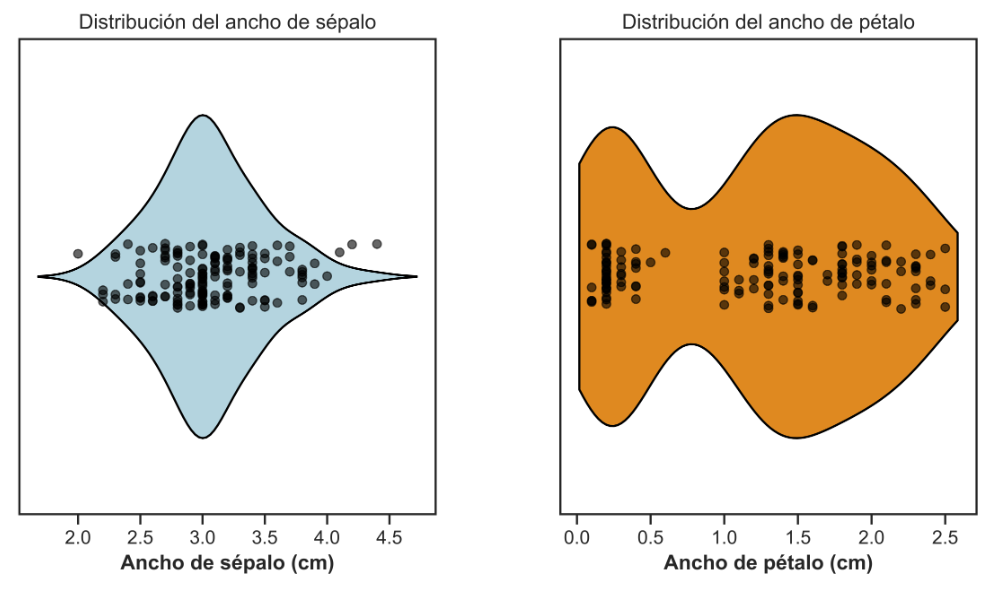
<br />

<div style="border-left: 4px solid #8a1717; padding: 0.5em; background: #f9f9f9;">
La función <code>plt.subplots()</code> de Matplotlib crea una figura con una cuadrícula de subgráficos (elemento llamado <code>axes</code>), permitiendo organizar varios gráficos en una sola figura. El uso básico es el siguiente:

<pre><code class="language-python">
fig, axes = plt.subplots(nrows, ncols)
</code></pre>

Donde <code>nrows</code> y <code>ncols</code> especifican el número de filas y columnas de subgráficos. La función devuelve una figura (<code>fig</code>) y un array de ejes (<code>axes</code>). Cada subgráfico individual es un objeto de tipo <code>Axes</code> que se puede personalizar de manera independiente.
</div>

<br />


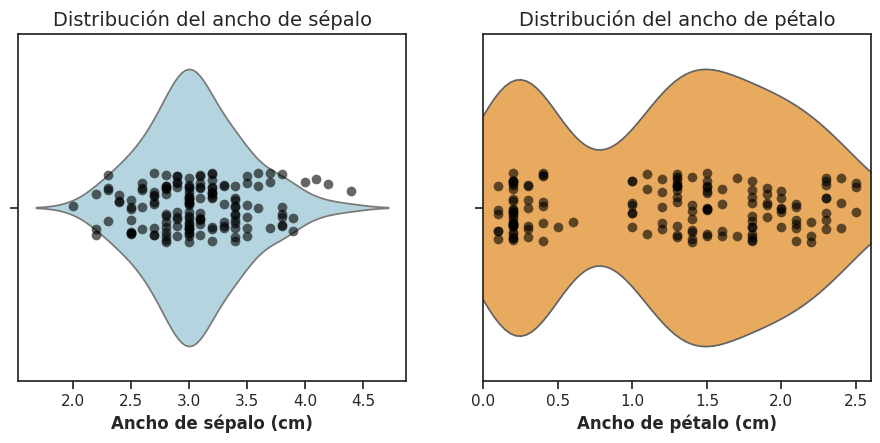

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(11,4.5))

sns.violinplot(df, x=df['sepal_width_cm'], ax=axes[0], color='lightblue', inner=None)  # Izquierda
sns.violinplot(df, x=df['petal_width_cm'], ax=axes[1], color='#ffac47', inner=None)  # Derecha
sns.stripplot(df, x=df['sepal_width_cm'], ax=axes[0], jitter=True, color='0', alpha=0.6, size=7)
sns.stripplot(df, x=df['petal_width_cm'], ax=axes[1], jitter=True, color='0', alpha=0.6, size=7)
axes[0].set_title("Distribución del ancho de sépalo",fontsize=14)
axes[0].set_xlabel("Ancho de sépalo (cm)", weight="bold")

axes[1].set_title("Distribución del ancho de pétalo", fontsize=14)
axes[1].set_xlabel("Ancho de pétalo (cm)", weight="bold")
axes[1].set_xlim(0,2.6)
plt.show()


3. Realice un boxplot múltiple que permita comparar la distribución del largo del pétalo de las flores entre las distintas especies. Comente brevemente lo observado. ¿Cuál de las especies presenta una mayor mediana del largo del pétalo?

Text(0, 0.5, 'Largo de pétalo (cm)')

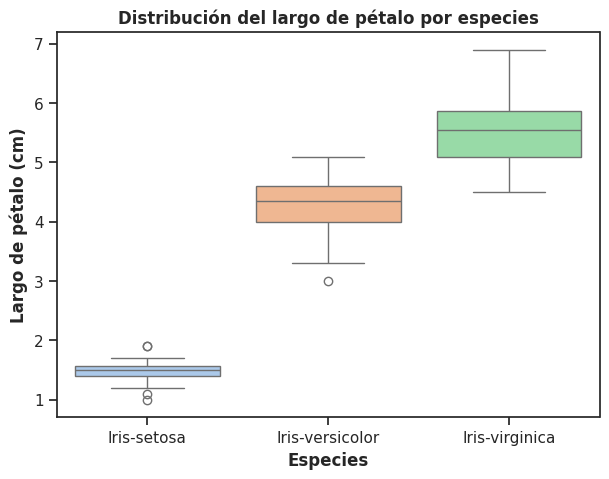

In [93]:
plt.figure(figsize=(7,5))
sns.boxplot(df, x=df['species'], y=df['petal_length_cm'], hue="species", palette="pastel")
plt.title("Distribución del largo de pétalo por especies", fontsize=12, weight="bold")
plt.xlabel("Especies", weight='bold')
plt.ylabel("Largo de pétalo (cm)", weight='bold')



4. Sobre cada uno de los boxplots del gráfico del ítem anterior, añada la media del largo del pétalo para la especie correspondiente. **Sugerencia:** utilice la función `stripplot()` de **Seaborn** para representar la medida descriptiva segmentada.

In [94]:
medias = df.groupby("species")["petal_length_cm"].mean()
medias_df = pd.DataFrame({
    'species' : medias.index,
    'petal_length_cm' : medias.values
})

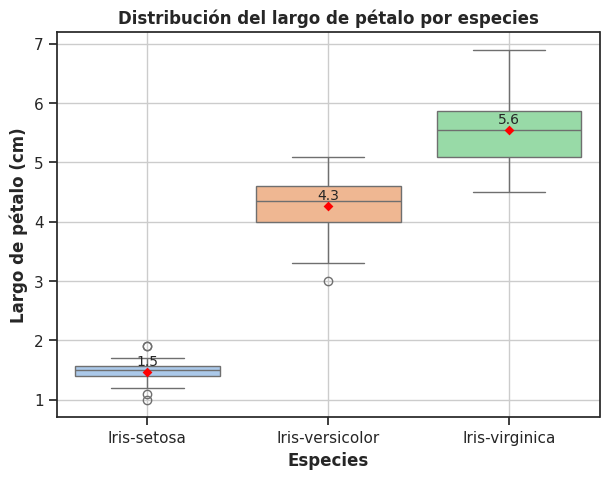

In [95]:
plt.figure(figsize=(7,5))
sns.boxplot(df, x=df['species'], y=df['petal_length_cm'], hue="species", palette="pastel", legend=False)
plt.title("Distribución del largo de pétalo por especies", fontsize=12, weight="bold")
plt.xlabel("Especies", weight='bold')
plt.ylabel("Largo de pétalo (cm)", weight='bold')


sns.stripplot(data=medias_df, x='species', y='petal_length_cm', color='red', size=5, marker='D')

for i, (especie, media) in enumerate(medias.items()):
  plt.text(i, media + 0.11, f'{media:.1f}', ha='center', fontsize=10)

plt.grid()
plt.show()



5. Construya un gráfico que le permita analizar la relación general que existe entre las variables ancho y largo del pétalo. Realice un comentario acerca de lo observado y complemente el gráfico anterior informando una medida de la fuerza y la dirección de la asociación lineal entre ambas variables.

In [96]:
df.columns

Index(['id', 'sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'species'],
      dtype='object')

<Axes: >

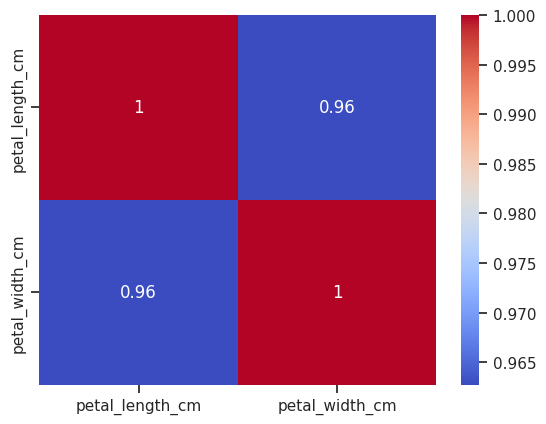

In [97]:
columnas_para_correlacion = ['petal_length_cm','petal_width_cm']
df_filtrado = df[columnas_para_correlacion]
sns.heatmap(df_filtrado.corr(), annot=True, cmap='coolwarm')

In [98]:
df_filtrado.corr()

,petal_length_cm,petal_width_cm
petal_length_cm,1.000000,0.962757
petal_width_cm,0.962757,1.000000


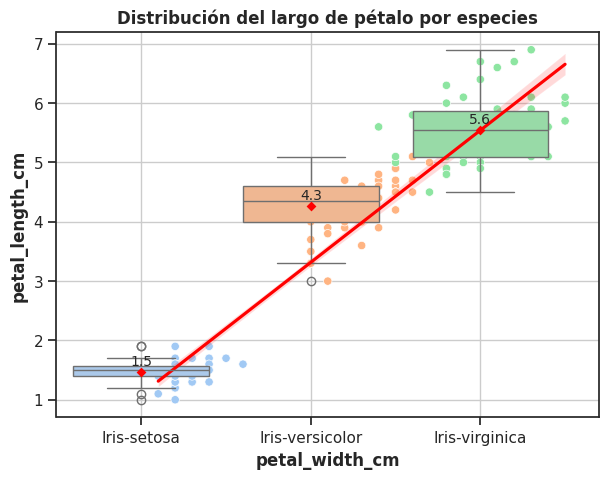

In [103]:
plt.figure(figsize=(7,5))
sns.boxplot(df, x=df['species'], y=df['petal_length_cm'], hue="species", palette="pastel", legend=False)
plt.title("Distribución del largo de pétalo por especies", fontsize=12, weight="bold")
plt.xlabel("Especies", weight='bold')
plt.ylabel("Largo de pétalo (cm)", weight='bold')

sns.scatterplot(df, x=df['petal_width_cm'], y=df['petal_length_cm'], hue="species", palette="pastel", legend=False)
sns.regplot(df, x=df['petal_width_cm'], y=df['petal_length_cm'], color='red', scatter=False)
sns.stripplot(data=medias_df, x='species', y='petal_length_cm', color='red', size=5, marker='D')

plt.xlim(-0.5,2.7)
for i, (especie, media) in enumerate(medias.items()):
  plt.text(i, media + 0.11, f'{media:.1f}', ha='center', fontsize=10)

plt.grid()
plt.show()